In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import datetime

In [4]:
"""
gr110 = pd.read_csv('ra_gr110_fixed.csv', header=None)
gr110.columns = ['date', 'city', 'what', 'crop', 'type', 'value']
gr110['date'] = pd.to_datetime(gr110['date'])
gr110['crop'] = gr110['crop'].apply(lambda x: x if x != 'soybeans' else 'soy')
gr110['loc'] = gr110['city'] + "_" + gr110['what']
"""

'\ngr110 = pd.read_csv(\'ra_gr110_fixed.csv\', header=None)\ngr110.columns = [\'date\', \'city\', \'what\', \'crop\', \'type\', \'value\']\ngr110[\'date\'] = pd.to_datetime(gr110[\'date\'])\ngr110[\'crop\'] = gr110[\'crop\'].apply(lambda x: x if x != \'soybeans\' else \'soy\')\ngr110[\'loc\'] = gr110[\'city\'] + "_" + gr110[\'what\']\n'

In [5]:
"""
mars = gr110.copy()
mars.drop(mars[(mars['crop'] == 'corn')&(mars['type']=='new')].index, inplace=True)
mars.drop(mars[(mars['crop'] == 'soy')&(mars['type']=='new')].index, inplace=True)
mars.drop(mars[(mars['crop'] == 'wheat')&(mars['type']=='cash')].index, inplace=True)
mars = mars.sort_values(by=['date'])
mars = mars.reset_index(drop=True)
mars.to_csv('mars.csv', index=False)
"""


"\nmars = gr110.copy()\nmars.drop(mars[(mars['crop'] == 'corn')&(mars['type']=='new')].index, inplace=True)\nmars.drop(mars[(mars['crop'] == 'soy')&(mars['type']=='new')].index, inplace=True)\nmars.drop(mars[(mars['crop'] == 'wheat')&(mars['type']=='cash')].index, inplace=True)\nmars = mars.sort_values(by=['date'])\nmars = mars.reset_index(drop=True)\nmars.to_csv('mars.csv', index=False)\n"

In [6]:
mars = pd.read_csv('mars.csv')
mars['date'] = pd.to_datetime(mars['date'])

In [7]:
# cme corn data
cme = pd.read_csv('all_corn.csv')
cme['date'] = pd.to_datetime(cme['date'])
cme = cme.drop(columns='Unnamed: 0')

In [8]:
basis = pd.read_csv('basis.csv')
basis['date'] = pd.to_datetime(basis['date'].astype(str))
basis = basis.drop(columns=['Unnamed: 0', '__fileposition__'])
for col in basis.columns:
    if isinstance(basis[col][0], str):
        basis[col] = basis[col].str.strip()

In [9]:
avebasis = pd.read_csv('basis_Avg.csv')
avebasis = avebasis.drop(columns=['Unnamed: 0', '__fileposition__'])
for col in avebasis.columns:
    if isinstance(avebasis[col][0], str):
        avebasis[col] = avebasis[col].str.strip()

In [10]:
avecorn = avebasis[avebasis['crop']=='corn']

In [11]:
avecorn['loc'].unique()

array(['Bladenboro_elevator', 'Bladenboro_feed_mill', 'Candor_feed_mill',
       'Clarkton_elevator', 'Clinton_elevator', 'Cofield_feed_mill',
       'Creswell_elevator', 'Elizabeth_City_elevator',
       'Lagrange_elevator', 'Laurinburg_feed_mill', 'Monroe_feed_mill',
       'Mount_Olive_elevator', 'Nashville_feed_mill', 'Norwood_elevator',
       'Pantego_2_feed_mill', 'Roaring_River_feed_mill',
       'Rose_Hill_1_feed_mill', 'Statesville_feed_mill',
       'Warsaw_feed_mill', 'Warsaw_2_elevator'], dtype=object)

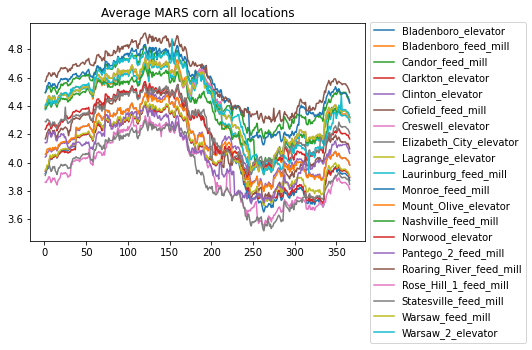

In [12]:
for loc in avecorn['loc'].unique():
    _ = avecorn[avecorn['loc']==loc]
    plt.plot(_['dayofyear'], _['averagemars'], label=loc)
plt.legend(bbox_to_anchor=(1,1.03))
plt.title("Average MARS corn all locations")
plt.savefig('all-mars.png')

In [13]:
def allmars(df, crop):
    df = df[df['crop']==crop]
    for loc in df['loc'].unique():
        _ = df[df['loc']==loc]
        plt.plot(_['dayofyear'], _['averagemars'], label=loc)
    plt.legend(bbox_to_anchor=(1,1.03))
    plt.title(f"Average MARS {crop} all locations")
    plt.savefig(f'pix/all-mars-{crop}.png', facecolor='white', transparent=False)

In [14]:
avebasis['crop'].unique()

array(['corn', 'wheat', 'soy'], dtype=object)

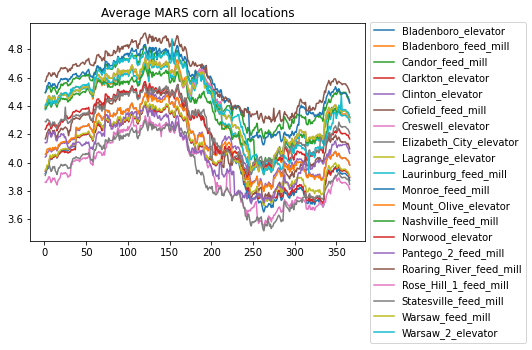

In [15]:
allmars(avebasis, 'corn')

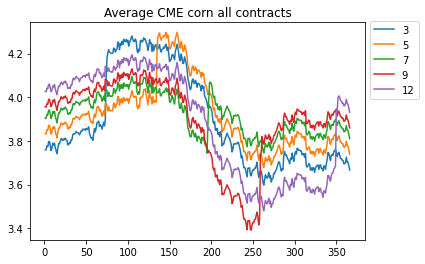

In [16]:
for m in avecorn['contractmonth'].unique():
    _ = avecorn[avecorn['contractmonth']==m]
    plt.plot(_['dayofyear'], _['averagecme'], label=str(m))
plt.legend(bbox_to_anchor=(1,1.03))
plt.title('Average CME corn all contracts')
plt.savefig('pix/all-cme.png')

In [17]:
def allcme(df, crop):
    df = df[df['crop']==crop]
    for m in df['contractmonth'].unique():
        _ = df[df['contractmonth']==m]
        plt.plot(_['dayofyear'], _['averagecme'], label=str(m))
    plt.legend(bbox_to_anchor=(1,1.03))
    plt.title(f'Average CME {crop} all contracts')
    plt.savefig(f'pix/all-cme-{crop}.png', facecolor='white', transparent=False)

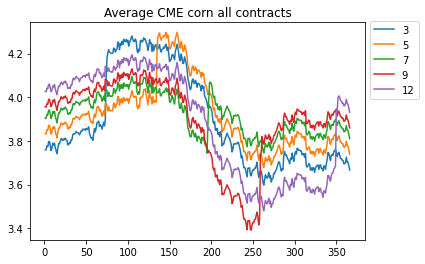

In [18]:
allcme(avebasis, 'corn')

In [19]:
print(max(avecorn['averagemars']/avecorn['averagecme']))
print(min(avecorn['averagemars']/avecorn['averagecme']))

1.2883453661411521
0.9298639545634659


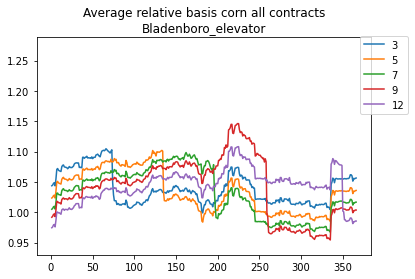

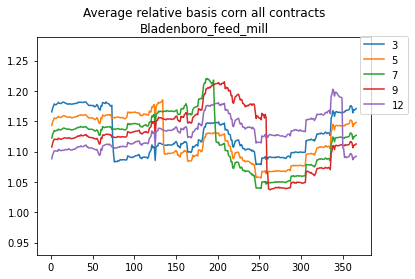

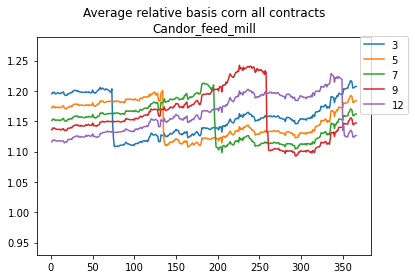

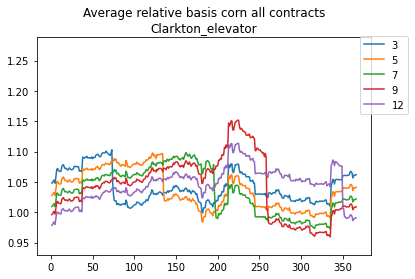

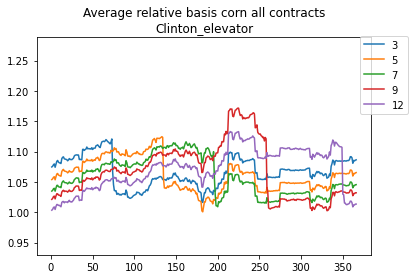

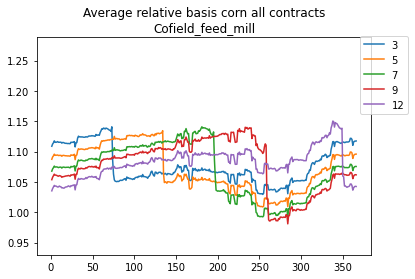

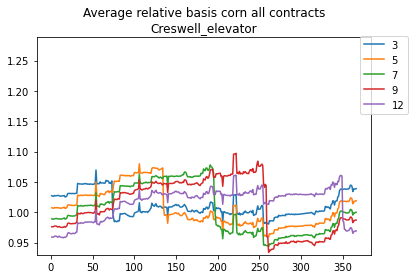

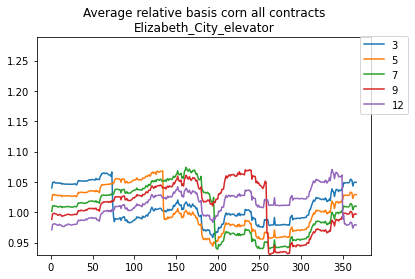

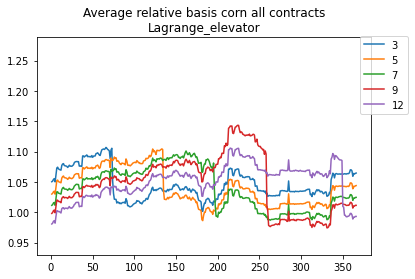

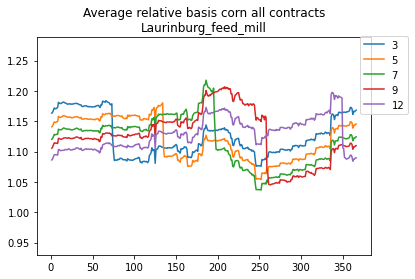

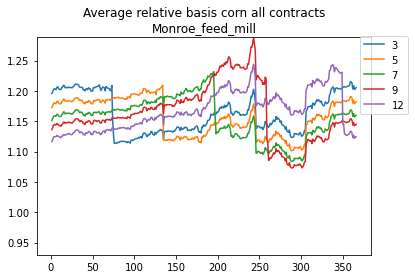

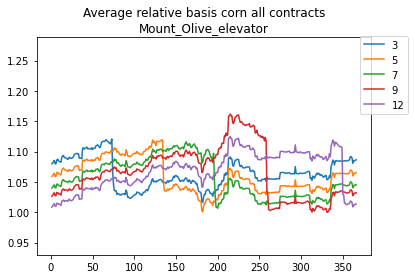

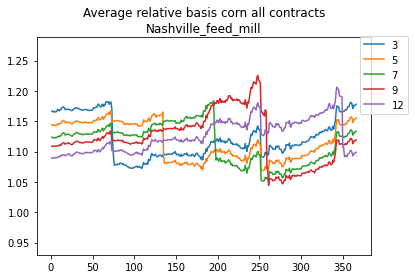

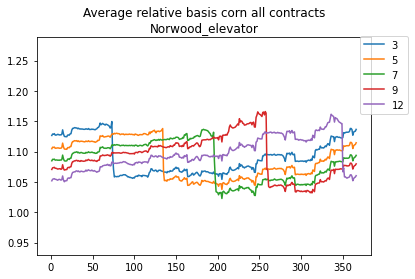

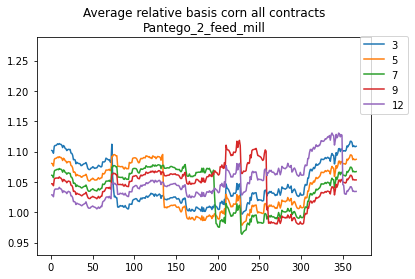

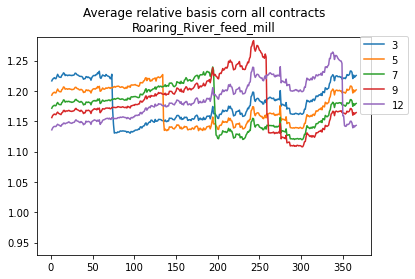

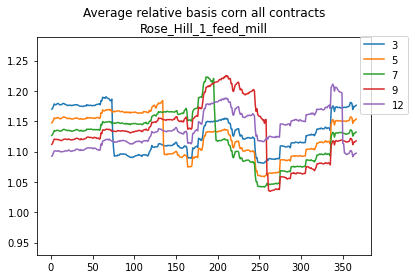

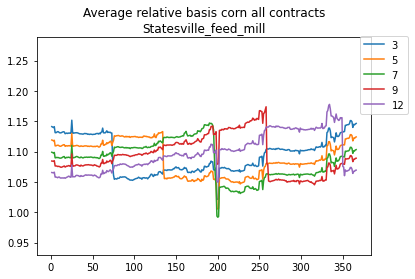

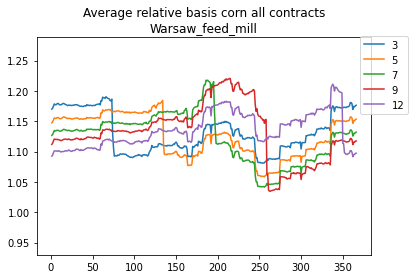

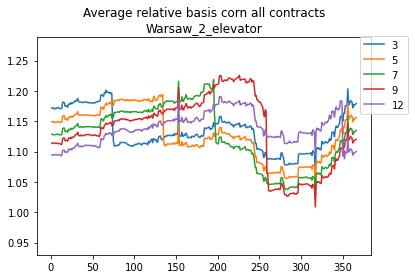

In [20]:
bmax, bmin = np.max(avecorn['averagemars']/avecorn['averagecme']), np.min(avecorn['averagemars']/avecorn['averagecme'])
months = np.sort(avecorn['contractmonth'].unique())

for loc in avecorn['loc'].unique():
    l = avecorn[avecorn['loc']==loc]
    for m in months:
        _ = l[l['contractmonth']==m]
        plt.plot(_['dayofyear'], _['averagemars'] / _['averagecme'], label=str(m))
    plt.title(f'Average relative basis corn all contracts\n{loc}')
    plt.ylim(bmin, bmax)
    plt.legend(loc='upper left', bbox_to_anchor=(.95,1.03))
    plt.savefig(f'pix/{loc}-relative-basis.png', facecolor='white', transparent=False)
    plt.show()


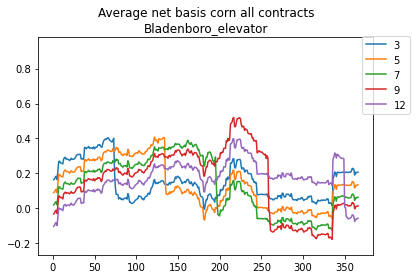

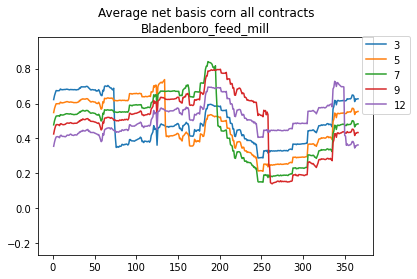

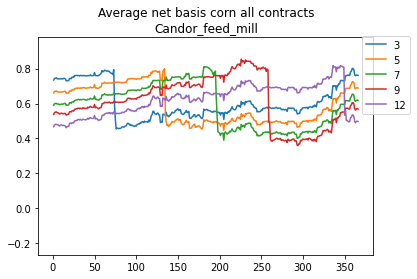

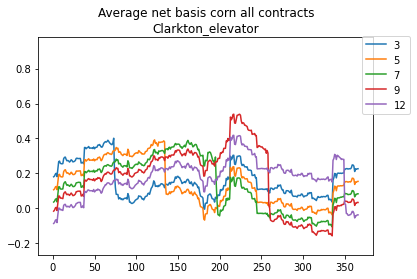

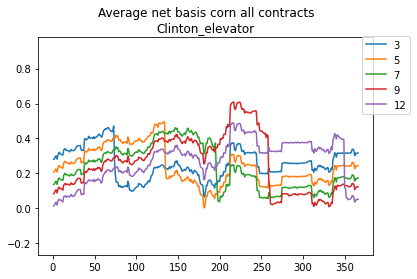

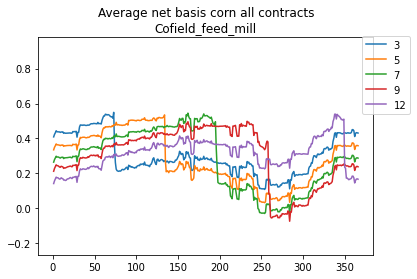

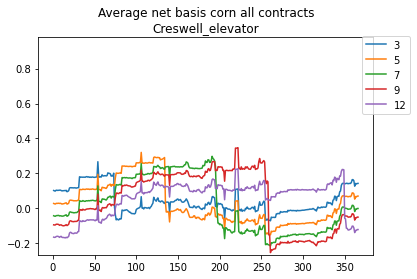

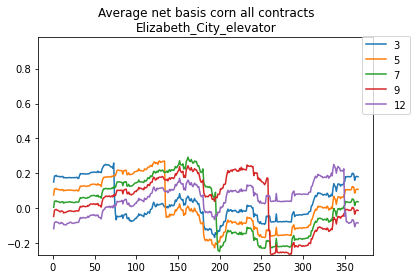

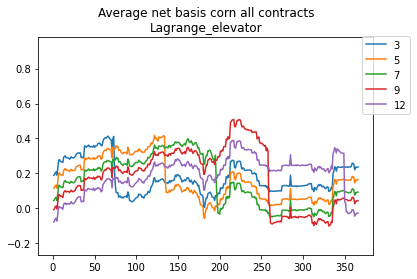

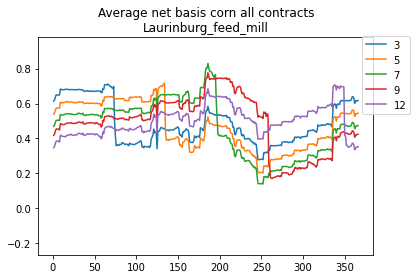

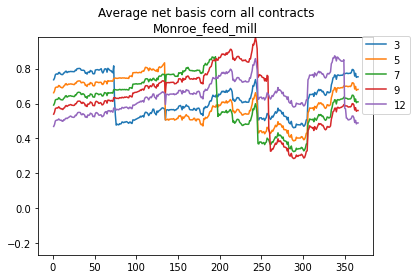

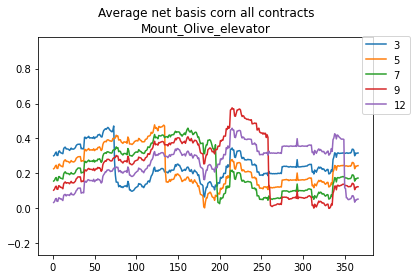

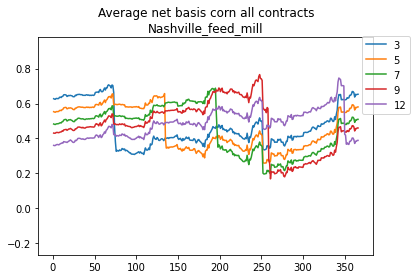

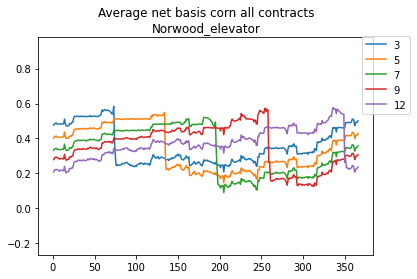

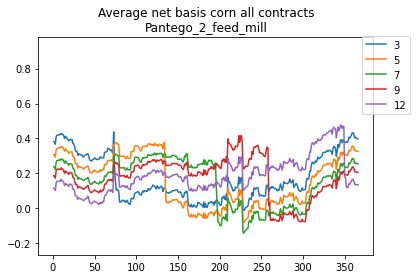

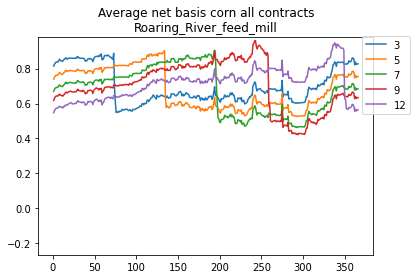

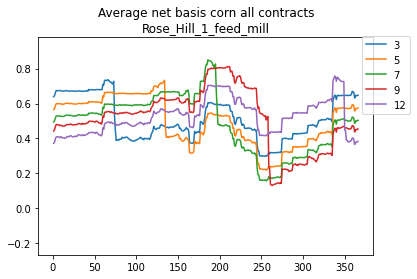

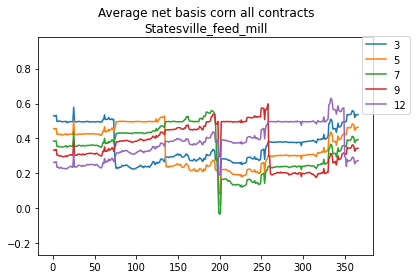

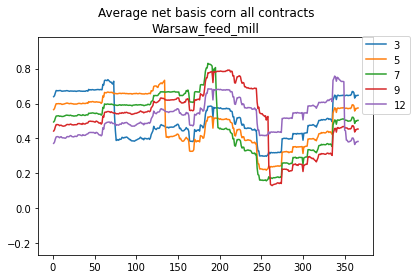

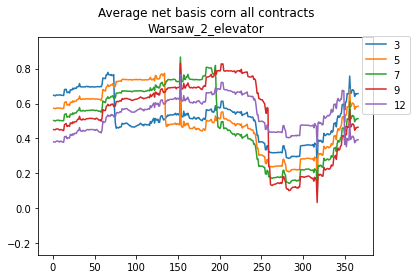

In [21]:
bmax, bmin = np.max(avecorn['averagemars'] - avecorn['averagecme']), np.min(avecorn['averagemars'] - avecorn['averagecme'])
months = np.sort(avecorn['contractmonth'].unique())

for loc in avecorn['loc'].unique():
    l = avecorn[avecorn['loc']==loc]
    for m in months:
        _ = l[l['contractmonth']==m]
        plt.plot(_['dayofyear'], _['averagemars'] - _['averagecme'], label=str(m))
    plt.title(f'Average net basis corn all contracts\n{loc}')
    plt.ylim(bmin, bmax)
    plt.legend(loc='upper left', bbox_to_anchor=(.95,1.03))
    plt.savefig(f'pix/{loc}-net-basis.png', facecolor='white', transparent=False)
    plt.show()


In [22]:
# combine into an animated gif
# convert -delay 150 -loop 0 *-{crop}-{which}-basis.png {crop}-{which}.gif

def allbasis(df, crop, which='relative'):
    if which == 'relative':
        F = lambda m, c: m/c
    elif which == 'net':
        F = lambda m, c: m - c
    else:
        assert False, "unknown which " + which
    
    df = df[df['crop']==crop]
    bmax = np.max(F(df['averagemars'], df['averagecme']))
    bmin = np.min(F(df['averagemars'], df['averagecme']))
    
    months = np.sort(df['contractmonth'].unique())

    for loc in df['loc'].unique():
        l = df[df['loc']==loc]
        for m in months:
            _ = l[l['contractmonth']==m]
            plt.plot(_['dayofyear'], F(_['averagemars'], _['averagecme']), label=str(m))
        plt.title(f'Average {which} basis {crop} all contracts\n{loc}')
        plt.ylim(bmin, bmax)
        plt.legend(loc='upper left', bbox_to_anchor=(.95,1.03))
        plt.savefig(f'pix/{loc}-{crop}-{which}-basis.png', facecolor='white', transparent=False)
        plt.show()


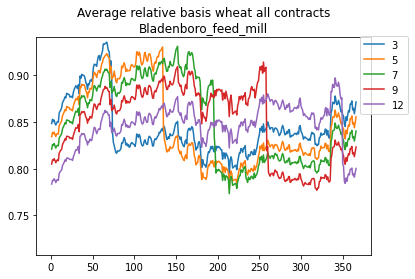

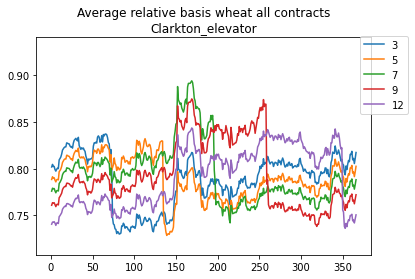

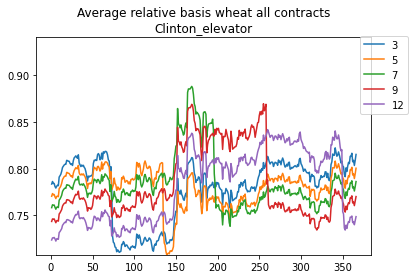

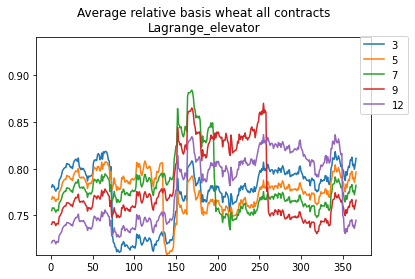

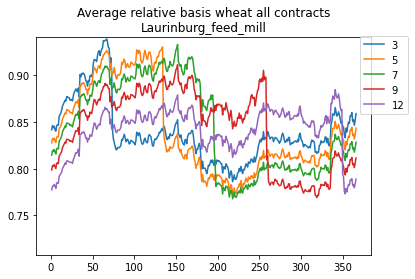

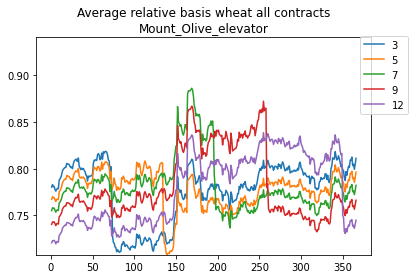

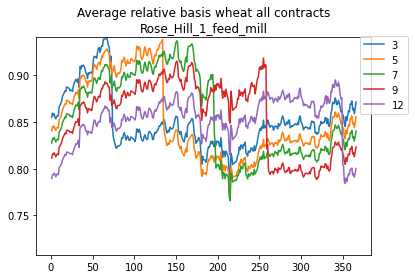

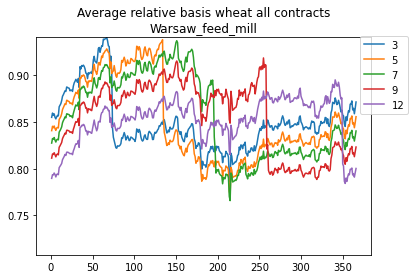

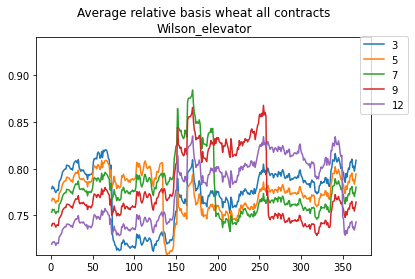

In [23]:
allbasis(avebasis, 'wheat')

# storage
Plot the cost/benefit of storing crop

In [24]:
def storage(df, crop, loc, start, end=366, cme=False, months=[]):
    assert start < end, "end not after start"
    df = df[df['crop']==crop]
    df = df[df['loc']==loc]
    df = df[df['dayofyear']>=start]
    df = df[df['dayofyear']<=end]
    df['basis'] = df['averagemars'] / df['averagecme']
    
    if cme == False:
        plt.ylabel('relative gain/loss')
        cme = 1.
    else:
        plt.ylabel('$/bushel')

    if not months:
        months = df['contractmonth'].unique()
        months = np.sort(months)

    for month in months:
        _ = df[df['contractmonth']==month]
        s = _.iloc[0]['basis']
        plt.plot(_['dayofyear'], (_['basis'] / s) * cme, label=str(month))
        
    plt.title(f'Storage analysis: {loc} {crop} months={months}')
    plt.legend()
    plt.xlabel('Day of the year')
    plt.show()

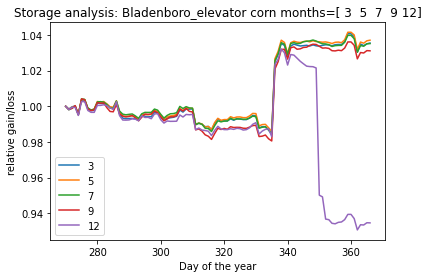

In [25]:
storage(avebasis, 'corn', 'Bladenboro_elevator', 270)

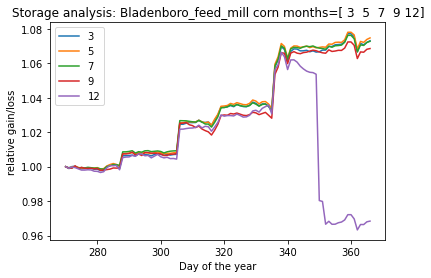

In [26]:
storage(avebasis, 'corn', 'Bladenboro_feed_mill', 270)

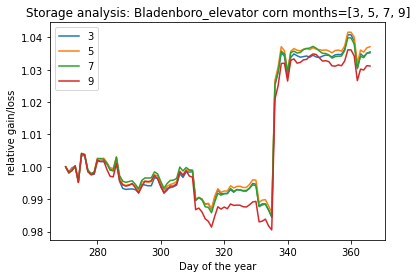

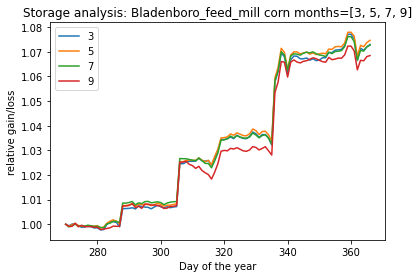

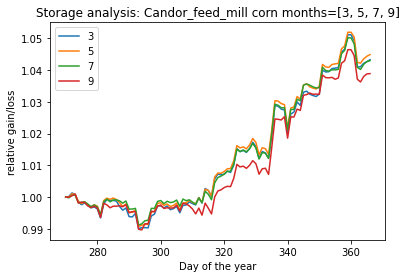

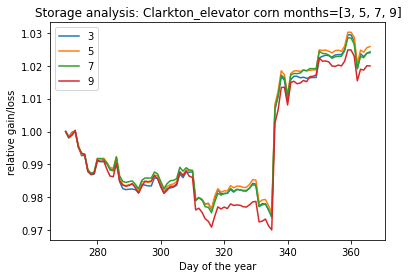

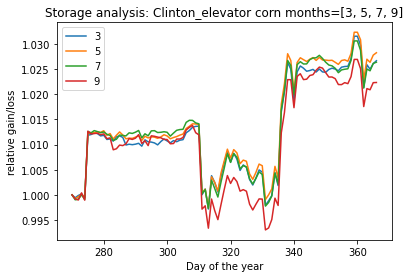

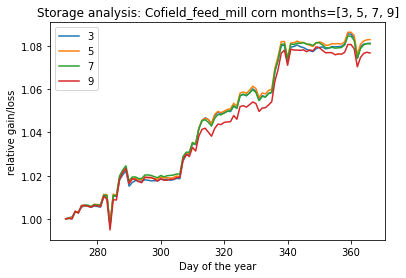

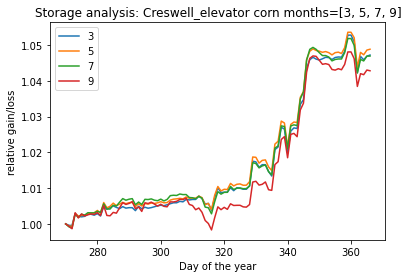

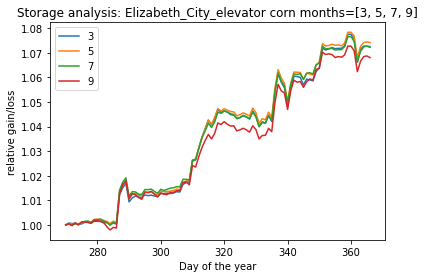

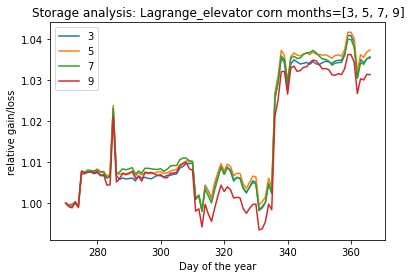

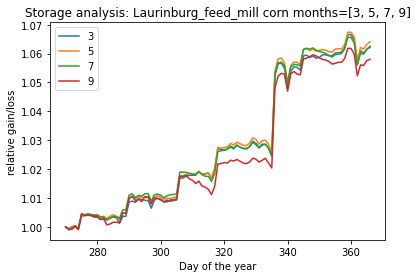

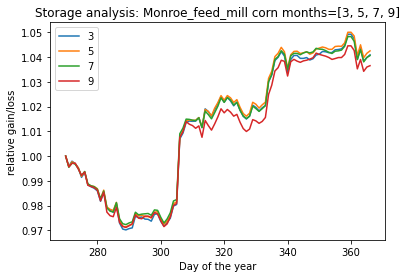

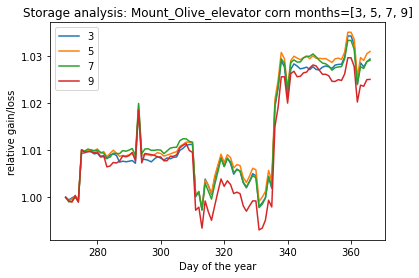

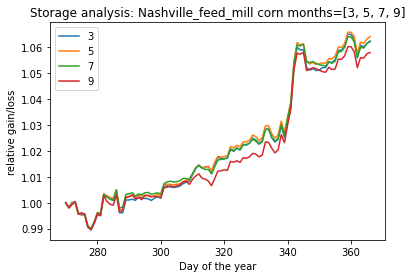

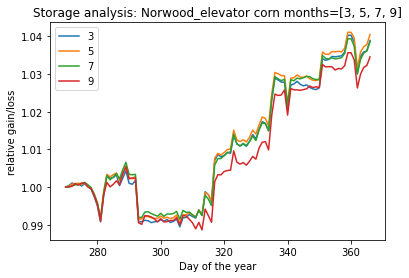

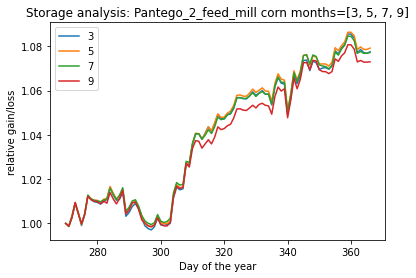

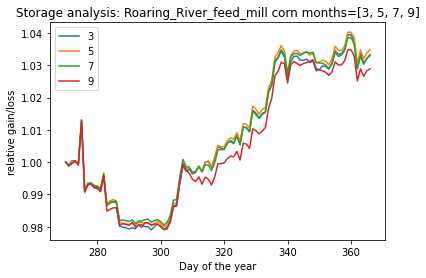

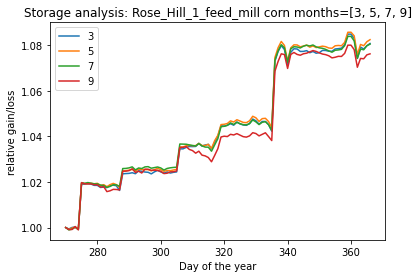

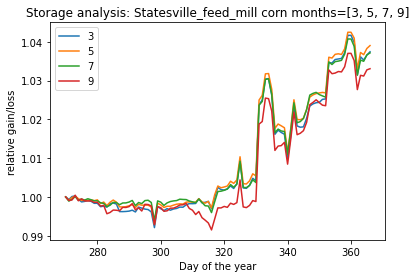

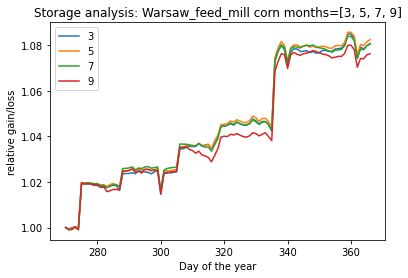

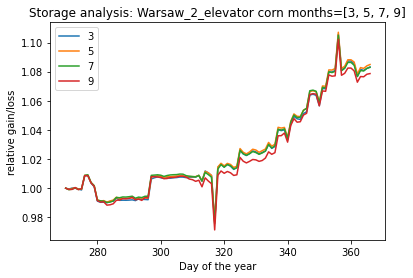

In [27]:
crop = 'corn'
for loc in avebasis[avebasis['crop']==crop]['loc'].unique():
    storage(avebasis, crop, loc, 270, months=[3,5,7,9])

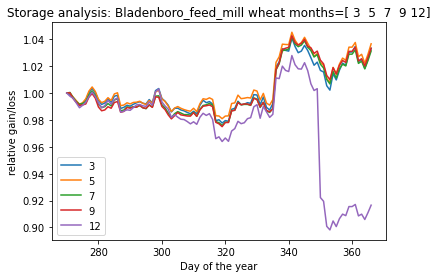

In [28]:
storage(avebasis, 'wheat', 'Bladenboro_feed_mill', 270)

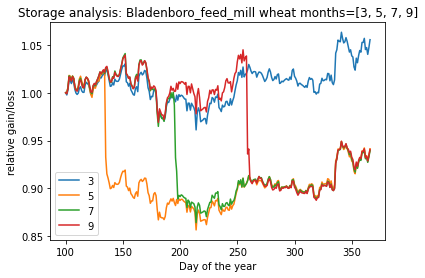

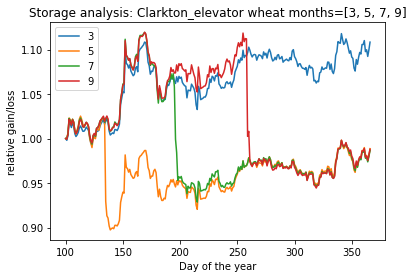

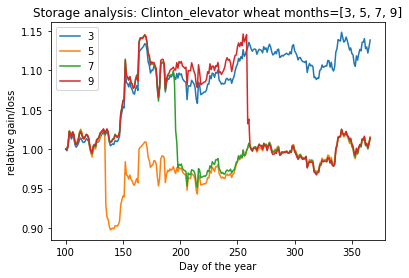

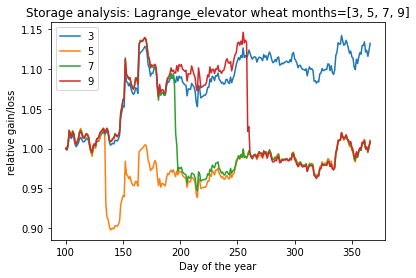

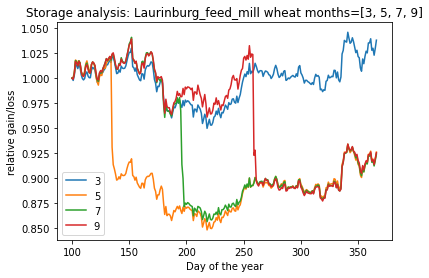

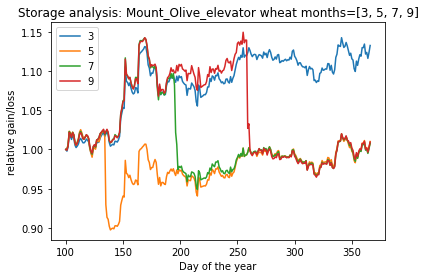

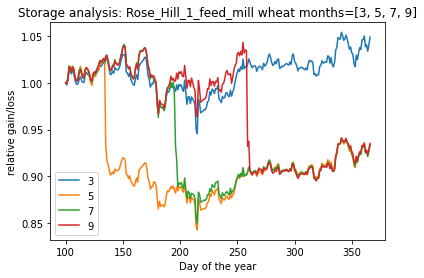

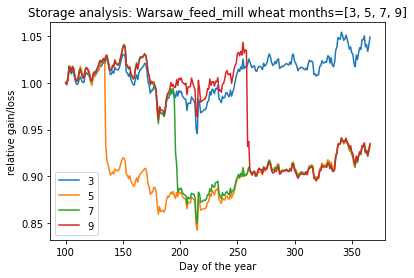

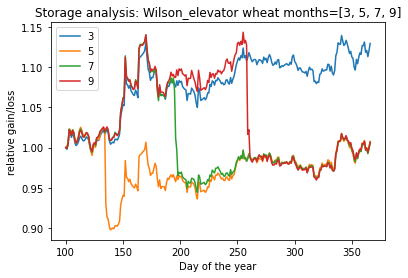

In [29]:
crop = 'wheat'
for loc in avebasis[avebasis['crop']==crop]['loc'].unique():
    storage(avebasis, crop, loc, 100, months=[3,5,7,9])

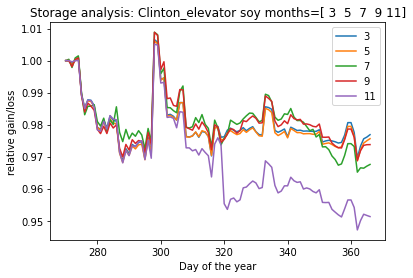

In [30]:
storage(avebasis, 'soy', 'Clinton_elevator', 270)

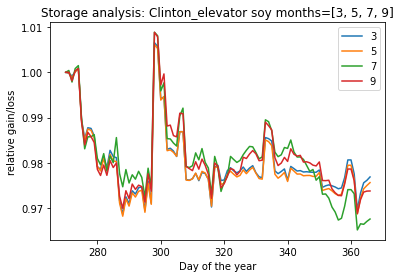

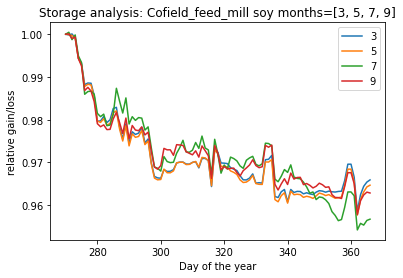

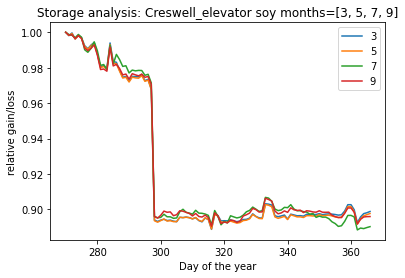

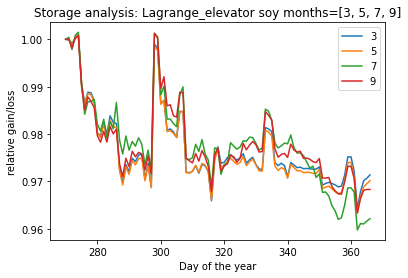

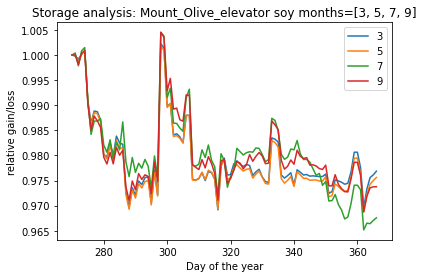

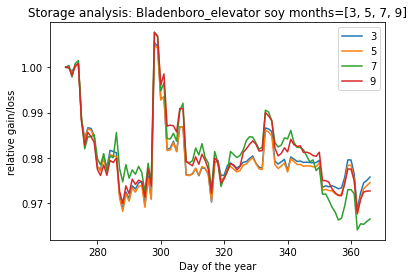

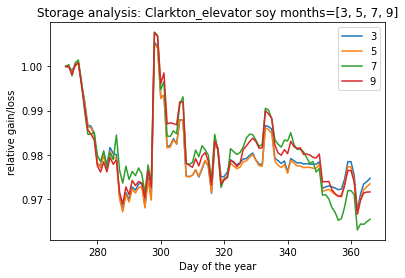

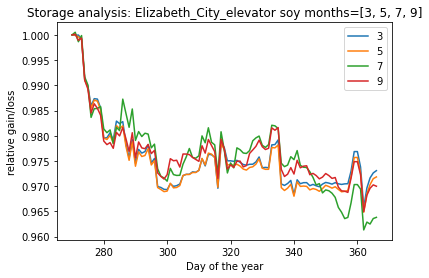

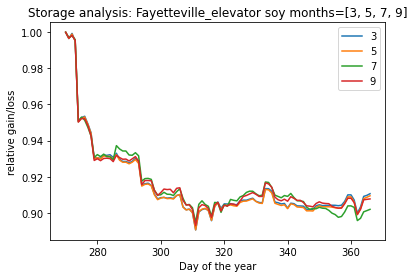

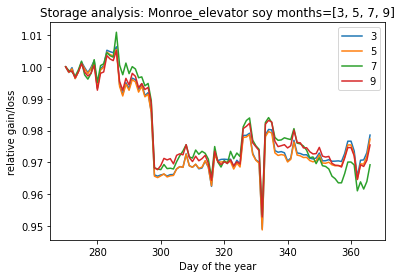

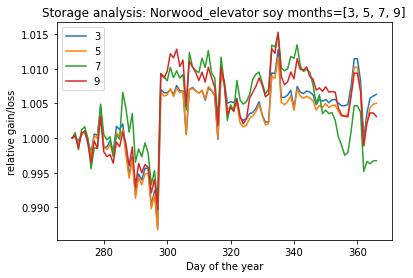

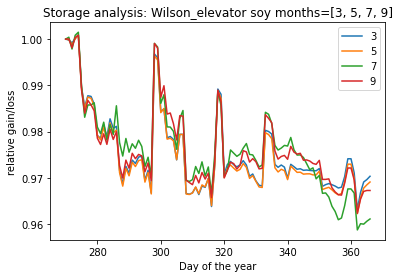

In [31]:
crop = 'soy'
for loc in avebasis[avebasis['crop']==crop]['loc'].unique():
    storage(avebasis, crop, loc, 270, months=[3,5,7,9])

# previous

In [32]:
def eyear(x):
    k = x['month'] <= x['date'].dt.month
    return x['date'].dt.year + k.astype(int)

cme = cme.assign(eyear=eyear)

In [33]:
next_cme = cme[cme['year'] == cme['eyear']]
next_cme = next_cme[next_cme['date'].dt.year > 2014]

In [34]:
local = mars[mars['date'].dt.year > 2014]
local = local[local['crop']=='corn']

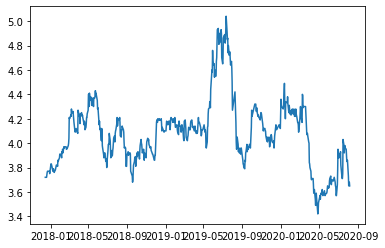

In [35]:
loc = local[local['loc']=='Creswell_feed_mill']
loc = loc[loc['crop']=='corn']
plt.plot(loc['date'], loc['value'])

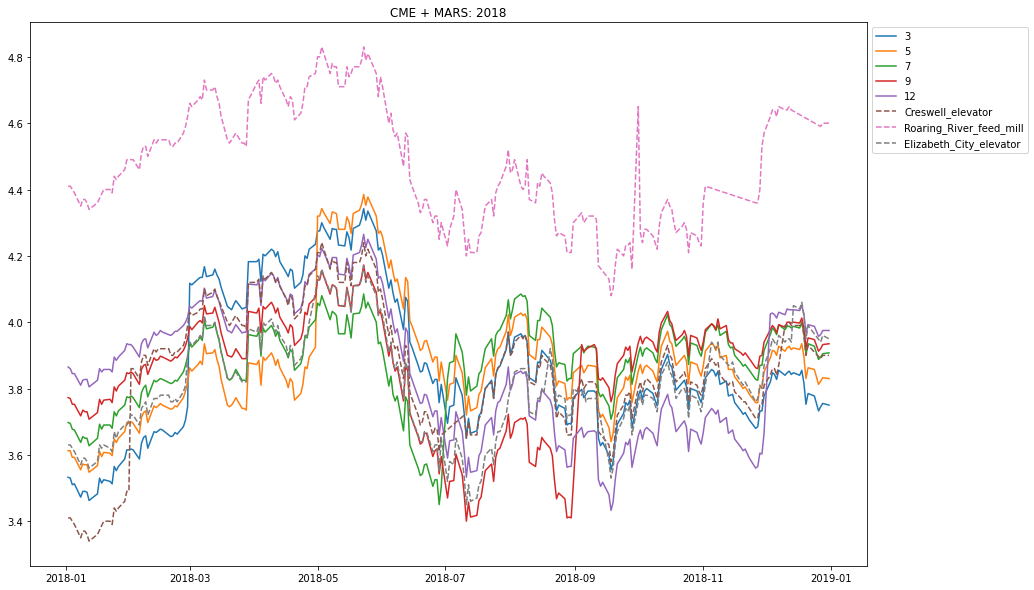

In [36]:
year = 2018
plt.figure(figsize=(15,10))

plt.title(f'CME + MARS: {year}')
_cme = next_cme[next_cme['date'].dt.year == year]
_local = local[local['date'].dt.year == year]

for m in np.sort(next_cme['month'].unique()):
    _df = _cme[_cme['month']==m]
    plt.plot(_df['date'], _df['close']/100, label=str(m))
locs = ['Creswell_elevator', 'Roaring_River_feed_mill', 'Elizabeth_City_elevator']
for loc in locs:
    _loc = _local[_local['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))
print()

In [37]:
np.sort(mars['loc'].unique())

array(['Barber_elevator', 'Barber_feed_mill', 'Belhaven_elevator',
       'Bladenboro_elevator', 'Bladenboro_feed_mill', 'Candor_feed_mill',
       'Chadbourn_elevator', 'Clarkton_elevator', 'Clement_elevator',
       'Cleveland_elevator', 'Clinton_elevator', 'Cofield_elevator',
       'Cofield_feed_mill', 'Creswell_elevator', 'Creswell_feed_mill',
       'Dunn_elevator', 'Elizabeth_City_elevator',
       'Fayetteville_elevator', 'Fayetteville_soybeans_processor',
       'Greenville1_elevator', 'Greenville2_elevator', 'Kinston_elevator',
       'Lagrange_elevator', 'Laurinburg_feed_mill', 'Lumberton_elevator',
       'Monroe_elevator', 'Monroe_feed_mill', 'Mount_Olive_elevator',
       'Mount_Ulla_elevator', 'Nashville_2_feed_mill',
       'Nashville_feed_mill', 'Norwood_elevator', 'Pantego_2_feed_mill',
       'Pantego_elevator', 'Raleigh_elevator',
       'Raleigh_soybeans_processor', 'Register_elevator',
       'Roaring_River_feed_mill', 'Rose_Hill_1_elevator',
       'Rose_Hill_1_f

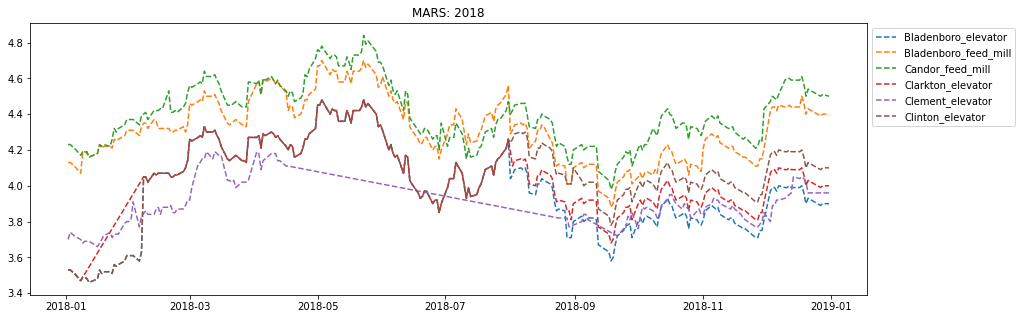

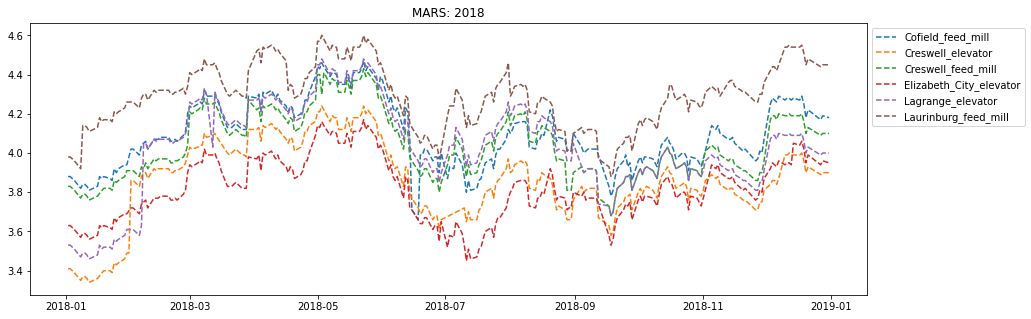

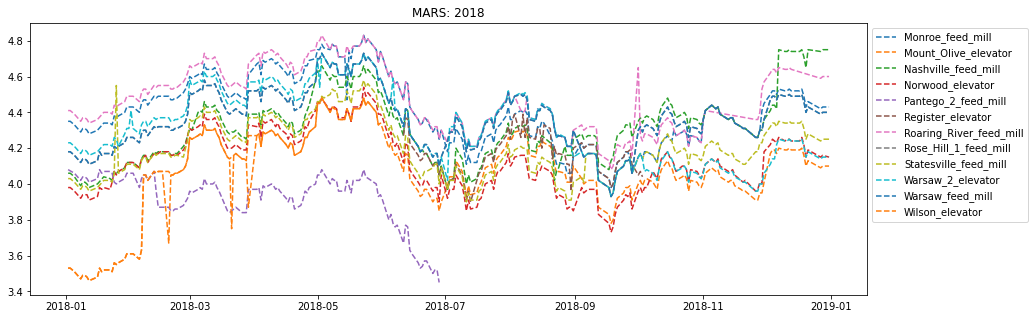

In [38]:
year = 2018
plt.figure(figsize=(15,5))
plt.title(f'MARS: {year}')

_mars = local[local['date'].dt.year == year]

locs = ['Statesville_E', 'Elizabeth_City_E', 'Cofield_E', 'Warsaw_2_E']
locs = np.sort(_mars['loc'].unique())
for loc in locs[:6]:
    _loc = _mars[_mars['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))
plt.show()

plt.figure(figsize=(15,5))
plt.title(f'MARS: {year}')

for loc in locs[6:12]:
    _loc = _mars[_mars['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))
plt.show()


plt.figure(figsize=(15,5))
plt.title(f'MARS: {year}')
for loc in locs[12:]:
    _loc = _mars[_mars['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))

print()

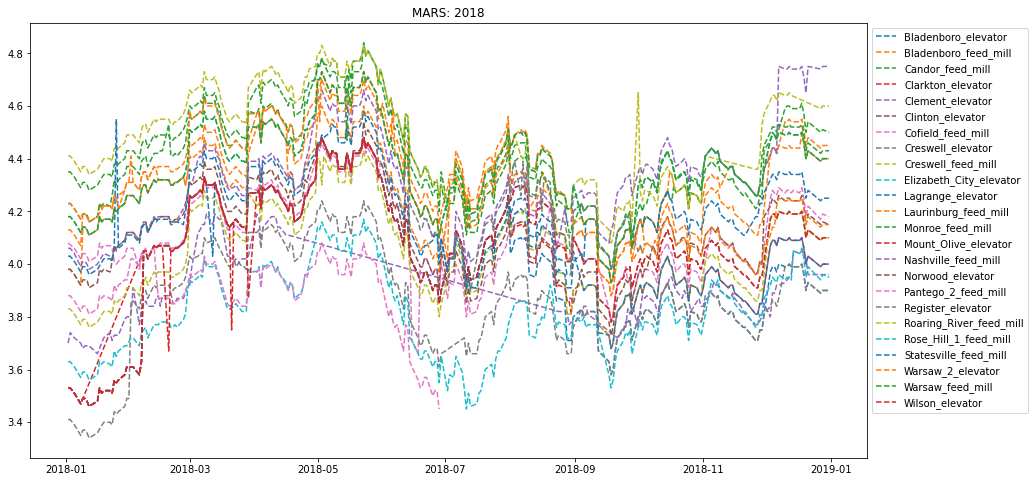

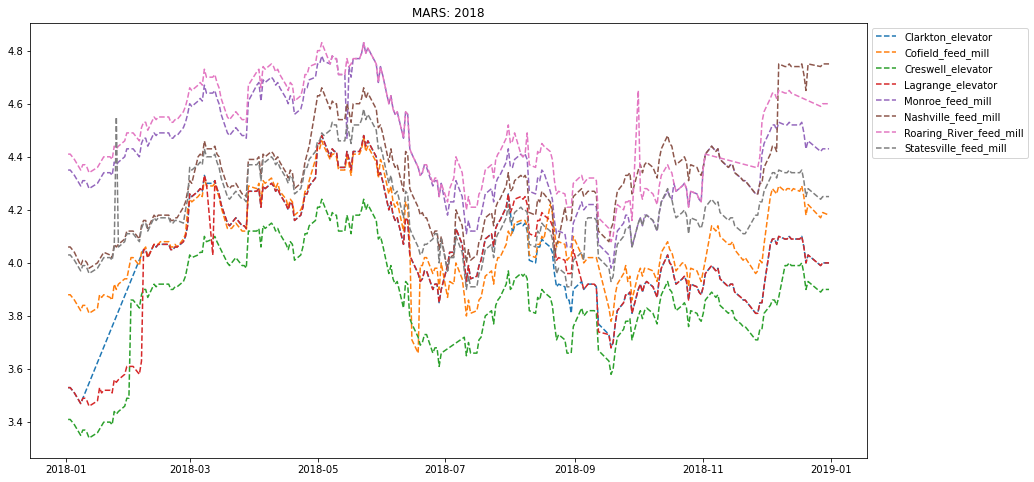

In [39]:
year = 2018
plt.figure(figsize=(15,8))
plt.title(f'MARS: {year}')

_mars = local[local['date'].dt.year == year]

locs = np.sort(_mars['loc'].unique())
for loc in locs:
    _loc = _mars[_mars['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))
plt.show()

plt.figure(figsize=(15,8))
plt.title(f'MARS: {year}')

locs = [#'Bladenboro_elevator', 'Bladenboro_feed_mill', 'Candor_feed_mill',
       'Clarkton_elevator', #'Clinton_elevator', 
    'Cofield_feed_mill',
       'Creswell_elevator', #'Elizabeth_City_elevator',
    'Lagrange_elevator', #'Laurinburg_feed_mill',
    'Monroe_feed_mill',
    #   'Mount_Olive_elevator', 
    'Nashville_feed_mill', #'Norwood_elevator',
    'Roaring_River_feed_mill', #'Rose_Hill_1_feed_mill',
    'Statesville_feed_mill', #'Warsaw_2_elevator', 'Warsaw_feed_mill'
]

for loc in locs:
    _loc = _mars[_mars['loc']==loc]
    plt.plot(_loc['date'], _loc['value'], '--', label=loc)
plt.legend(loc='upper left', bbox_to_anchor=(1.,1))
print()

In [40]:
corn = mars[mars['crop']=='corn']['loc'].unique()
wheat = mars[mars['crop']=='wheat']['loc'].unique()
soy = mars[mars['crop']=='soy']['loc'].unique()

print(set(corn)&set(wheat)&set(soy))

{'Kinston_elevator', 'Rose_Hill_2_feed_mill', 'Bladenboro_elevator', 'Clement_elevator', 'Lagrange_elevator', 'Pantego_elevator', 'Warsaw_feed_mill', 'Dunn_elevator', 'Barber_feed_mill', 'Greenville2_elevator', 'Rose_Hill_1_feed_mill', 'Rose_Hill_1_elevator', 'Creswell_elevator', 'Chadbourn_elevator', 'Creswell_feed_mill', 'Elizabeth_City_elevator', 'Mount_Olive_elevator', 'Statesville_feed_mill', 'Cofield_feed_mill', 'Barber_elevator', 'Cleveland_elevator', 'Register_elevator', 'Lumberton_elevator', 'Laurinburg_feed_mill', 'Clinton_elevator', 'Candor_feed_mill', 'Greenville1_elevator', 'Selma_feed_mill', 'Norwood_elevator', 'Monroe_elevator', 'Warsaw_2_elevator', 'Clarkton_elevator', 'Mount_Ulla_elevator', 'Wilson_elevator'}


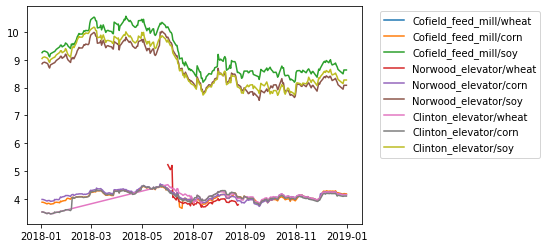

In [41]:
_2018 = mars[mars['date'].dt.year==2018]

locs = ['Cofield_feed_mill', 'Norwood_elevator']
locs += ['Clinton_elevator']
for loc in locs:
    _df = _2018[_2018['loc']==loc]
    #plt.figure(figsize=(15,5))
    #plt.title(loc)
    for crop in ['wheat', 'corn', 'soy']:
        _crop = _df[_df['crop']==crop]
        plt.plot(_crop['date'], _crop['value'], label=loc+"/"+crop)
plt.legend(loc='upper left', bbox_to_anchor=(1.04,1))
plt.show()

# Hedging

Q - quantity ==> 0.5
S - Sell price (hedge date)
F - Final price (recon date)
C - Harvested ==> 1.0
M - Mars price (sell date)

Q x S - sell hedge
Q x F - buy hedge
(B + F) x C - gross for crop

(B + F) x C - Q(F - S)
MC - Q(F-S)
M_1 C - Q(F_1-S_1) --> mu sigma

display M - S over time for forecasting: show M, S, M-S, M/S

basis by date for a contract and location (M-F)

First question:
 what is M:S?
 mu sigma for M-S

In [42]:
def getClosest(df, day, stride=7):
    '''find the price closest to the day, up to stride days away'''
    a = df[df['dayofyear']==day]
    if a.empty:
        a = df[df['dayofyear']<day]
        if a.empty:
            return None
        a = df[df['dayofyear']>=day-stride]
        if a.empty:
            return None
        else:
            return ailoc[-1]['value']
    else:
        return a.iloc[-1]['value']

In [43]:
mars[mars['date']=='20000103'].empty

False

In [44]:
S = mars.copy()
S['dayofyear'] = S['date'].dt.dayofyear
Scorn = S[S['crop']=='corn']

In [45]:
Scorn.head()

date        city       what  crop     type  value  \
1 2000-01-03      Monroe  feed_mill  corn  archive   2.31   
3 2000-01-03    Creswell   elevator  corn  archive   1.90   
4 2000-01-03  Laurinburg  feed_mill  corn  archive   2.10   
5 2000-01-03   Nashville  feed_mill  corn  archive   2.24   
7 2000-01-03     Cofield  feed_mill  corn  archive   2.21   

                    loc  dayofyear  
1      Monroe_feed_mill          3  
3     Creswell_elevator          3  
4  Laurinburg_feed_mill          3  
5   Nashville_feed_mill          3  
7     Cofield_feed_mill          3

In [46]:
C = cme[cme['year']>=2000]
C = C[C['date'].dt.year == C['year']]

In [47]:
C.head()

year  month    open   close  open_net  close_net  open_rel  close_rel  \
63906  2000      7  218.75  214.75     43.50      39.50  1.248217   1.225392   
63909  2000     12  234.50  231.50     24.00      21.00  1.114014   1.099762   
63910  2000      3  205.50  200.75    -23.25     -28.00  0.898361   0.877596   
63911  2000      5  212.00  208.00    -24.00     -28.00  0.898305   0.881356   
63913  2000      9  225.00  222.00     45.75      42.75  1.255230   1.238494   

       volume  openint  day       date  eyear  
63906    7451    59436  193 2000-01-03   2000  
63909    5531    35915  346 2000-01-03   2000  
63910   44630   213948   71 2000-01-03   2000  
63911    4414    62419  130 2000-01-03   2000  
63913    1480    17403  255 2000-01-03   2000

In [48]:
a = _[_['dayofyear']==270]['value']
plt.boxplot(a)
print(a.mean(), a.std(), a.median(), a.max(), a.min())

KeyError: 'value'

In [49]:
for year in df['year'].unique():
    _ = df[df['year']==year]
    _ = _.sort_values('dayofyear')
    plt.plot(_['dayofyear'], _['cme'], label=str(year))
plt.legend()

NameError: name 'df' is not defined